In [1]:
#importing required libraries
import pandas as pd 
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

In [2]:
#fetching the stock data
start = '2014-01-01'
end = '2025-03-30'

stock='GOOG'

data = yf.download(stock,start,end)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [3]:
data

Price,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG
Date,,,,,
2014-01-02,27.593388,27.708162,27.472912,27.651396,73129082
2014-01-03,27.392101,27.687837,27.390366,27.639994,66917888
2014-01-06,27.697504,27.735678,27.427797,27.590663,71037271
2014-01-07,28.231462,28.252039,27.792695,27.887885,102486711
2014-01-08,28.290215,28.441181,28.093387,28.408459,90036218
...,...,...,...,...,...
2025-03-24,169.929993,170.500000,167.440002,169.264999,18742800
2025-03-25,172.789993,172.910004,170.550003,171.179993,13841600


In [5]:
data.reset_index(inplace=True)

In [6]:
data

Price,Date,Close,High,Low,Open,Volume
Ticker,,GOOG,GOOG,GOOG,GOOG,GOOG
0,2014-01-02,27.593388,27.708162,27.472912,27.651396,73129082
1,2014-01-03,27.392099,27.687835,27.390364,27.639993,66917888
2,2014-01-06,27.697502,27.735676,27.427795,27.590661,71037271
3,2014-01-07,28.231462,28.252039,27.792695,27.887885,102486711
4,2014-01-08,28.290213,28.441179,28.093385,28.408457,90036218
...,...,...,...,...,...,...
2822,2025-03-24,169.929993,170.500000,167.440002,169.264999,18742800
2823,2025-03-25,172.789993,172.910004,170.550003,171.179993,13841600
2824,2025-03-26,167.139999,171.940002,166.860992,171.300003,22498000


In [7]:
moving_average_100days=data.Close.rolling(100).mean()

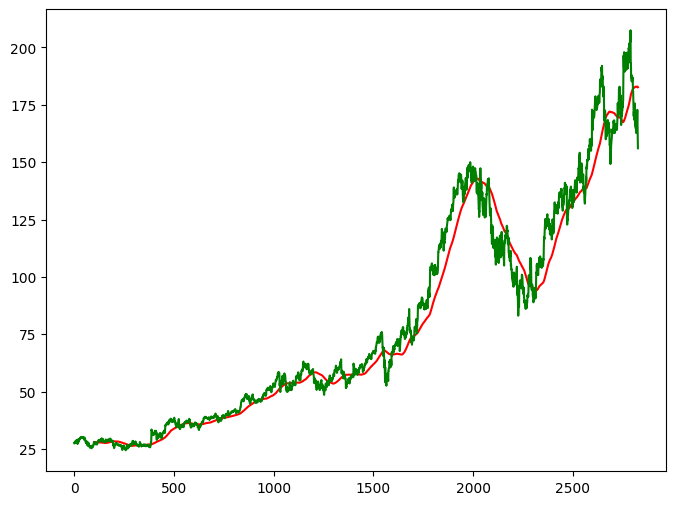

In [8]:
plt.figure(figsize=(8,6))
plt.plot(moving_average_100days,"r")
plt.plot(data.Close,"g")
plt.show()

In [9]:
moving_average_200days=data.Close.rolling(200).mean()

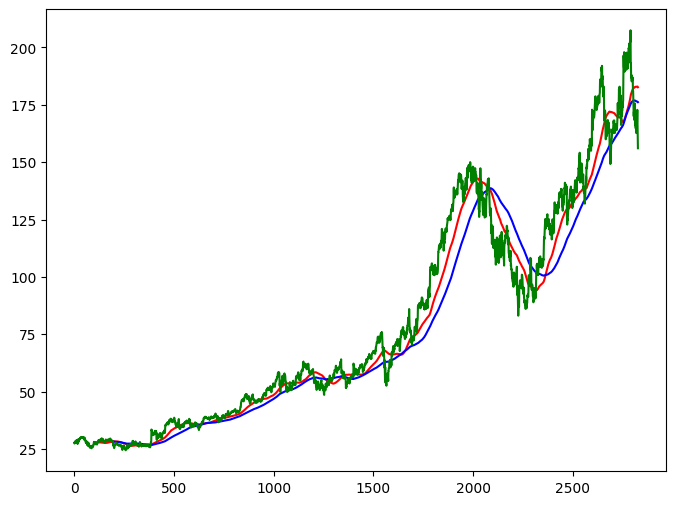

In [10]:
plt.figure(figsize=(8,6))
plt.plot(moving_average_100days,"r")
plt.plot(moving_average_200days,"b")
plt.plot(data.Close,"g")
plt.show()

In [11]:
data.dropna(inplace=True)

In [12]:
data_train=pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test=pd.DataFrame(data.Close[int(len(data)*0.80) : len(data)])

In [13]:
data_train.shape

(2261, 1)

In [14]:
data_test.shape[0]

566

In [15]:
# data scaling 
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

In [16]:
data_train_scale=scaler.fit_transform(data_train)

In [17]:
x=[]
y=[]
for i in range(100,data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])

In [18]:
x,y=np.array(x),np.array(y)

In [19]:
from keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential

In [21]:
model=Sequential()
model.add(LSTM(units = 50,activation = 'relu',return_sequences=True,
               input_shape = ((x.shape[1],1))))
model.add(Dropout(0.2))
model.add(LSTM(units= 60,activation = 'relu' ,return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(units=80,activation = 'relu' , return_sequences=True))
model.add(Dropout(0.4))
model.add(LSTM(units=120,activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units =1))

In [22]:
model.compile(optimizer = 'adam',loss = 'mean_squared_error')

In [23]:
model.fit(x,y, epochs=50, batch_size = 32, verbose=1)

Epoch 1/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 40s 376ms/step - loss: 0.0675
Epoch 2/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 25s 370ms/step - loss: 0.0077
Epoch 3/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 26s 381ms/step - loss: 0.0060
Epoch 4/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 24s 356ms/step - loss: 0.0052
Epoch 5/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 26s 381ms/step - loss: 0.0056
Epoch 6/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 26s 381ms/step - loss: 0.0053
Epoch 7/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 25s 366ms/step - loss: 0.0044
Epoch 8/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 30s 434ms/step - loss: 0.0041
Epoch 9/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 32s 462ms/step - loss: 0.0048
Epoch 10/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 31s 456ms/step - loss: 0.0038
Epoch 11/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 28s 411ms/step - loss: 0.0041
Epoch 12/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 27s 393ms/step - loss: 0.0044
Epoch 13/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 25s 373ms/step - loss: 0.0039
Epoch 14/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 27s 391ms/step - loss: 0.0034
Epoch 15/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 26s 

In [24]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                        │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_6 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_7 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [26]:
past_100days_data=data_train.tail(100)

In [27]:
data_test=pd.concat([past_100days_data, data_test], ignore_index=True)

In [28]:
data_test

Ticker,GOOG
0,118.220047
1,118.309631
2,117.662704
3,117.583076
4,116.946091
...,...
661,169.929993
662,172.789993
663,167.139999
664,164.080002


In [29]:
data_test_scale=scaler.fit_transform(data_test)

In [32]:
data_test_scale

array([[0.282396  ],
       [0.28311626],
       [0.27791493],
       [0.27727472],
       [0.27215331],
       [0.29736014],
       [0.29071828],
       [0.3133645 ],
       [0.31520478],
       [0.31224411],
       [0.29471942],
       [0.29904057],
       [0.27711468],
       [0.25270804],
       [0.25030741],
       [0.24974718],
       [0.27375369],
       [0.22253997],
       [0.21485784],
       [0.21141699],
       [0.2053353 ],
       [0.21653833],
       [0.20157431],
       [0.19197178],
       [0.21597823],
       [0.2074959 ],
       [0.22638089],
       [0.22710121],
       [0.174607  ],
       [0.17908826],
       [0.16332404],
       [0.16116338],
       [0.16292386],
       [0.14675952],
       [0.13219563],
       [0.13667681],
       [0.12547378],
       [0.12259303],
       [0.11683142],
       [0.13803711],
       [0.11683142],
       [0.10130736],
       [0.12651412],
       [0.15140081],
       [0.14988035],
       [0.15004039],
       [0.1286746 ],
       [0.121

In [35]:
x=[]
y=[]
for i in range(100,data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])
x,y=np.array(x),np.array(y)

In [36]:
y_predict=model.predict(x)

18/18 ━━━━━━━━━━━━━━━━━━━━ 6s 221ms/step


In [40]:
scaled=1/scaler.scale_

In [41]:
scaled

array([124.37721252])

In [42]:
y_predict=y_predict*scaled

In [43]:
y_predict

array([[ 18.96423749],
       [ 18.54779195],
       [ 18.1152759 ],
       [ 17.6678106 ],
       [ 17.21734655],
       [ 16.77569341],
       [ 16.35706276],
       [ 15.9682824 ],
       [ 15.60548437],
       [ 15.26872056],
       [ 14.96086553],
       [ 14.68621909],
       [ 14.46057377],
       [ 14.2937524 ],
       [ 14.19261983],
       [ 14.15498541],
       [ 14.17186029],
       [ 14.24064978],
       [ 14.38155185],
       [ 14.61551137],
       [ 14.94237451],
       [ 15.34421923],
       [ 15.80573489],
       [ 16.31603296],
       [ 16.8530788 ],
       [ 17.4008167 ],
       [ 17.95144215],
       [ 18.52331271],
       [ 19.1191862 ],
       [ 19.73368601],
       [ 20.36283853],
       [ 20.98542457],
       [ 21.5695329 ],
       [ 22.08216807],
       [ 22.49294787],
       [ 22.77974126],
       [ 22.93344451],
       [ 22.95694889],
       [ 22.86210479],
       [ 22.6591428 ],
       [ 22.35965386],
       [ 21.97680984],
       [ 21.5225779 ],
       [ 21

In [44]:
y=y*scaled

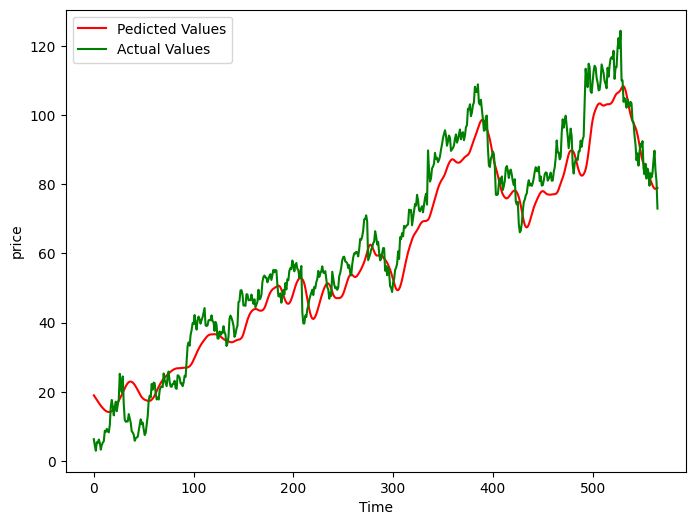

In [50]:
plt.figure(figsize=(8,6))
plt.plot(y_predict,'r',label="Pedicted Values")
plt.plot(y,'g',label="Actual Values")
plt.xlabel("Time")
plt.ylabel("price")
plt.legend()
plt.show()

In [51]:
model.save('Stock Predictions Model.keras')